# 10 Minutes Pandas [link](https://pandas.pydata.org/docs/user_guide/10min.html#min)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [3]:
# dataframs (index are the keyes)  (columns are the titles)
dates = pd.date_range('20130101', periods=6) #year-month-day
print(dates)

print()
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')



,A,B,C,D
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534
2013-01-02,-0.632742,0.864489,-1.904211,1.991019
2013-01-03,0.069413,-0.134840,-1.160587,0.983197
2013-01-04,-0.138401,-1.368630,-0.422709,-0.293634
2013-01-05,-0.866339,-0.810588,-0.017718,-0.665597
2013-01-06,-0.870676,-0.928153,-1.347181,1.330785


In [4]:
# creating data frame form dictionary
df2 = pd.DataFrame(
    {
        'A': 1.0,
        'B': pd.Timestamp('20130102'),
        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
        'D': np.array([3]*4, dtype=np.int32),
        'E': pd.Categorical(['test', 'train', 'test', 'train']),
        'F': 'foo'
    }
)
#datafram columns type
print(df2.dtypes)
df2

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [5]:
# accessing a column returning a series
print(df2.C)
print(df2['C'])

#displaying index (keys)
print('\n', df2.index)
print(list(df2.index))

#displaying columns
print('\n', df2.columns)
print(list(df2.columns))

0    1.0
1    1.0
2    1.0
3    1.0
Name: C, dtype: float32
0    1.0
1    1.0
2    1.0
3    1.0
Name: C, dtype: float32

 Int64Index([0, 1, 2, 3], dtype='int64')
[0, 1, 2, 3]

 Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
['A', 'B', 'C', 'D', 'E', 'F']


In [6]:
# accessing raws
df[:3]

,A,B,C,D
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534
2013-01-02,-0.632742,0.864489,-1.904211,1.991019
2013-01-03,0.069413,-0.134840,-1.160587,0.983197


In [7]:
# converting data frame to numpy
'''
    if all data types are the same pandas will return a numpy array with the save datatype
    if columns are not the same datatype will return them as object and we nedd to cast every column in order to use it
        in addition it is heavy operatoin
'''
print(df.to_numpy())
np_object = df2.to_numpy() # array of objects
type(np_object[0][1])

[[-0.4252571   1.07383932 -1.19042563 -1.59053408]
 [-0.63274158  0.86448894 -1.90421127  1.99101857]
 [ 0.06941321 -0.13483968 -1.16058725  0.98319707]
 [-0.13840122 -1.3686299  -0.42270887 -0.29363373]
 [-0.86633935 -0.81058793 -0.01771842 -0.66559657]
 [-0.87067626 -0.92815317 -1.34718116  1.3307846 ]]


pandas._libs.tslibs.timestamps.Timestamp

In [8]:
# describing the data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.477334,-0.217314,-1.007139,0.292539
std,0.386449,1.002693,0.677941,1.359955
min,-0.870676,-1.368630,-1.904211,-1.590534
25%,-0.807940,-0.898762,-1.307992,-0.572606
50%,-0.528999,-0.472714,-1.175506,0.344782
75%,-0.210115,0.614657,-0.607178,1.243888
max,0.069413,1.073839,-0.017718,1.991019


In [9]:
# transposing
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.425257,-0.632742,0.069413,-0.138401,-0.866339,-0.870676
B,1.073839,0.864489,-0.134840,-1.368630,-0.810588,-0.928153
C,-1.190426,-1.904211,-1.160587,-0.422709,-0.017718,-1.347181
D,-1.590534,1.991019,0.983197,-0.293634,-0.665597,1.330785


In [10]:
# sort by index of column
'''
axis=0 sort raws by index(keys)
axis=1 sort columns by column's mean value
'''
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.590534,-1.190426,1.073839,-0.425257
2013-01-02,1.991019,-1.904211,0.864489,-0.632742
2013-01-03,0.983197,-1.160587,-0.134840,0.069413
2013-01-04,-0.293634,-0.422709,-1.368630,-0.138401
2013-01-05,-0.665597,-0.017718,-0.810588,-0.866339
2013-01-06,1.330785,-1.347181,-0.928153,-0.870676


In [11]:
# sort by a specific columns
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.138401,-1.368630,-0.422709,-0.293634
2013-01-06,-0.870676,-0.928153,-1.347181,1.330785
2013-01-05,-0.866339,-0.810588,-0.017718,-0.665597
2013-01-03,0.069413,-0.134840,-1.160587,0.983197
2013-01-02,-0.632742,0.864489,-1.904211,1.991019
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534


# Selection

## Selection by label 
### (i.e: index_name\s, or column_name\s)  = `df.loc['20130101', 'A']`
### using: `DataFrame.loc[]` or, `DataFrame.at[]`

In [12]:
# get a column -> return a series
print(df['A'])
print(df.A)

2013-01-01   -0.425257
2013-01-02   -0.632742
2013-01-03    0.069413
2013-01-04   -0.138401
2013-01-05   -0.866339
2013-01-06   -0.870676
Freq: D, Name: A, dtype: float64
2013-01-01   -0.425257
2013-01-02   -0.632742
2013-01-03    0.069413
2013-01-04   -0.138401
2013-01-05   -0.866339
2013-01-06   -0.870676
Freq: D, Name: A, dtype: float64


In [13]:
# selection of raws -> return a Dataframe NOTE df[0] is not allowed use df.loc
df[0:3] #using normal python indexing (end=3 is not includes)
df['20130101':'20130103'] #from start until end (end in includes unlike python indexing)

,A,B,C,D
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534
2013-01-02,-0.632742,0.864489,-1.904211,1.991019
2013-01-03,0.069413,-0.134840,-1.160587,0.983197


In [14]:
df[:1]

,A,B,C,D
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534


In [15]:
# seleting a single raw -> return:
'''
    a series: given a single index
    a DataFrame given multiple indcies
'''
indcies = df.index
print(df.loc[indcies[0]]) # a Series
df.loc[indcies[0:3]] # a DataFrame

A   -0.425257
B    1.073839
C   -1.190426
D   -1.590534
Name: 2013-01-01 00:00:00, dtype: float64


,A,B,C,D
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534
2013-01-02,-0.632742,0.864489,-1.904211,1.991019
2013-01-03,0.069413,-0.134840,-1.160587,0.983197


In [16]:
# slecting multiple axis by label (column)
df.loc[:,['A', 'B']] # input is (index, columns list)

,A,B
2013-01-01,-0.425257,1.073839
2013-01-02,-0.632742,0.864489
2013-01-03,0.069413,-0.134840
2013-01-04,-0.138401,-1.368630
2013-01-05,-0.866339,-0.810588
2013-01-06,-0.870676,-0.928153


In [17]:
# selecting by index and columns
df.loc['20130101': '20130104',['A', 'B']] # input is (index, columns list)

,A,B
2013-01-01,-0.425257,1.073839
2013-01-02,-0.632742,0.864489
2013-01-03,0.069413,-0.134840
2013-01-04,-0.138401,-1.368630


In [18]:
#selecting specifc set of raws
df.loc[['20130101', '20130104'],['A', 'B']] # input is (index, columns list)

,A,B
2013-01-01,-0.425257,1.073839
2013-01-04,-0.138401,-1.368630


In [19]:
# getting a cell 
val = df.loc['20130101', 'A']
print(type(val))
val

<class 'numpy.float64'>


-0.4252571044445993

In [20]:
# fast access similar to the above 
df.at['20130101', 'A']

-0.4252571044445993

## Selecting by position 
## (i.e: index of index(key)\s, and index of column\s) = `df.iloc[0, 0]`
### `DataFrame.iloc[]`, or `DataFrame.iat[]`

In [21]:
# selecting a row
'''
return: 
    a Series if selecting a single raw
    a DataFrame if selecting multiple raws, or columns
'''
df.iloc[3] # forth raw

A   -0.138401
B   -1.368630
C   -0.422709
D   -0.293634
Name: 2013-01-04 00:00:00, dtype: float64

In [22]:
#selecting multiple raws and columns using interger slicing
df.iloc[0:4, 0: 3]

,A,B,C
2013-01-01,-0.425257,1.073839,-1.190426
2013-01-02,-0.632742,0.864489,-1.904211
2013-01-03,0.069413,-0.134840,-1.160587
2013-01-04,-0.138401,-1.368630,-0.422709


In [23]:
# specific raws and columns
df.iloc[[0, 4], [0, 3]]

,A,D
2013-01-01,-0.425257,-1.590534
2013-01-05,-0.866339,-0.665597


In [24]:
# specifc raws and all columns
df.iloc[[0, 4], :]

,A,B,C,D
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534
2013-01-05,-0.866339,-0.810588,-0.017718,-0.665597


In [25]:
# all raws and specifc columns
df.iloc[:, [0, 3]]

,A,D
2013-01-01,-0.425257,-1.590534
2013-01-02,-0.632742,1.991019
2013-01-03,0.069413,0.983197
2013-01-04,-0.138401,-0.293634
2013-01-05,-0.866339,-0.665597
2013-01-06,-0.870676,1.330785


In [26]:
# access a cell i.e: scaler
df.iloc[0, 0]

-0.4252571044445993

In [27]:
# fast access to scaler
df.iat[0, 0]

-0.4252571044445993

## Boolean Indexing (same as numpy)

In [28]:
x = np.random.rand(4, 4, 3)
print(x)
x[x>.9]

[[[0.47927662 0.28809368 0.82244339]
  [0.51659374 0.64435418 0.87809397]
  [0.73366659 0.19584986 0.70529866]
  [0.56878748 0.30013406 0.83171619]]

 [[0.79383201 0.75270092 0.69241547]
  [0.90926306 0.98399996 0.51344855]
  [0.40011565 0.59755785 0.96892875]
  [0.39419945 0.68501253 0.37418332]]

 [[0.92098424 0.23363662 0.21261749]
  [0.42072292 0.66415914 0.96975108]
  [0.21831981 0.82182894 0.25385664]
  [0.98368396 0.5976792  0.31495908]]

 [[0.32948508 0.73802704 0.15285024]
  [0.94299142 0.19427269 0.28303086]
  [0.93562908 0.7001414  0.56528329]
  [0.60958029 0.01499147 0.00126431]]]


array([0.90926306, 0.98399996, 0.96892875, 0.92098424, 0.96975108,
       0.98368396, 0.94299142, 0.93562908])

In [29]:
# boolean indexng 
print(df.loc[:,'A']>0)
print()
df[df.loc[:, 'A']>0]

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05    False
2013-01-06    False
Freq: D, Name: A, dtype: bool



,A,B,C,D
2013-01-03,0.069413,-0.13484,-1.160587,0.983197


In [30]:
# boolean indexing
print(df.loc[:,'A':'C'] >0)
print(df[df.loc[:,'A':'C'] >0])

# correct way
df[df['A']>0][df['B']>0]

                A      B      C
2013-01-01  False   True  False
2013-01-02  False   True  False
2013-01-03   True  False  False
2013-01-04  False  False  False
2013-01-05  False  False  False
2013-01-06  False  False  False
                   A         B   C   D
2013-01-01       NaN  1.073839 NaN NaN
2013-01-02       NaN  0.864489 NaN NaN
2013-01-03  0.069413       NaN NaN NaN
2013-01-04       NaN       NaN NaN NaN
2013-01-05       NaN       NaN NaN NaN
2013-01-06       NaN       NaN NaN NaN


/tmp/ipykernel_7964/2630552352.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['A']>0][df['B']>0]


,A,B,C,D


In [31]:
# using isin
df2 = df.copy()
df2['E'] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534,one
2013-01-02,-0.632742,0.864489,-1.904211,1.991019,one
2013-01-03,0.069413,-0.134840,-1.160587,0.983197,two
2013-01-04,-0.138401,-1.368630,-0.422709,-0.293634,three
2013-01-05,-0.866339,-0.810588,-0.017718,-0.665597,four
2013-01-06,-0.870676,-0.928153,-1.347181,1.330785,three


In [32]:
print(df2['E'].isin(['one', 'four']))
df2[df2['E'].isin(['one', 'four'])]

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool


,A,B,C,D,E
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534,one
2013-01-02,-0.632742,0.864489,-1.904211,1.991019,one
2013-01-05,-0.866339,-0.810588,-0.017718,-0.665597,four


## Setting

### by label using: `DataFrame.loc[] = new_value`, `DataFrame.at[]= new_value`
### by value  using: `DataFrame.iloc[] = new_value`, `DataFrame.iat[]= new_value`

In [33]:
# setting an elemnt in a series
s1 = pd.Series(np.arange(1, 7, dtype=np.int32), index=pd.date_range('20130102', periods=6))
print(s1)
df['F'] = s1
df

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int32


,A,B,C,D,F
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534,NaN
2013-01-02,-0.632742,0.864489,-1.904211,1.991019,1.0
2013-01-03,0.069413,-0.134840,-1.160587,0.983197,2.0
2013-01-04,-0.138401,-1.368630,-0.422709,-0.293634,3.0
2013-01-05,-0.866339,-0.810588,-0.017718,-0.665597,4.0
2013-01-06,-0.870676,-0.928153,-1.347181,1.330785,5.0


In [34]:
# setting the second raw, 'A' by "label"
indcies = df.index
df.loc[indcies[1], 'A'] = 0 # same as 'at'
df

,A,B,C,D,F
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534,NaN
2013-01-02,0.000000,0.864489,-1.904211,1.991019,1.0
2013-01-03,0.069413,-0.134840,-1.160587,0.983197,2.0
2013-01-04,-0.138401,-1.368630,-0.422709,-0.293634,3.0
2013-01-05,-0.866339,-0.810588,-0.017718,-0.665597,4.0
2013-01-06,-0.870676,-0.928153,-1.347181,1.330785,5.0


In [35]:
# setting second raw and second columns by "value => index"
df.iloc[1, 1] = 11
df

,A,B,C,D,F
2013-01-01,-0.425257,1.073839,-1.190426,-1.590534,NaN
2013-01-02,0.000000,11.000000,-1.904211,1.991019,1.0
2013-01-03,0.069413,-0.134840,-1.160587,0.983197,2.0
2013-01-04,-0.138401,-1.368630,-0.422709,-0.293634,3.0
2013-01-05,-0.866339,-0.810588,-0.017718,-0.665597,4.0
2013-01-06,-0.870676,-0.928153,-1.347181,1.330785,5.0


In [36]:
# setting a whole column
df.loc[:, 'D'] = np.arange(len(df))
df

/tmp/ipykernel_7964/3768638159.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.arange(len(df))


,A,B,C,D,F
2013-01-01,-0.425257,1.073839,-1.190426,0,NaN
2013-01-02,0.000000,11.000000,-1.904211,1,1.0
2013-01-03,0.069413,-0.134840,-1.160587,2,2.0
2013-01-04,-0.138401,-1.368630,-0.422709,3,3.0
2013-01-05,-0.866339,-0.810588,-0.017718,4,4.0
2013-01-06,-0.870676,-0.928153,-1.347181,5,5.0


In [37]:
# adding new raw

#last elemnt
print(f'LAST ELEMENT: \n{df[-2:-1]}')
print(f'\n{df.iloc[-1]}')
print(f'\n{df.loc[df.index[-1]]}')

#appending element
l = df.index[-1]
new_day = pd.Timestamp(year=l.year, month=l.month, day=l.day+1)
df.loc[new_day] = {'A': 1, 'B': 2, 'C': 3, 'D':4}
print(f'APPENDING ELEMENT: \n{df.iloc[-1]}')


#removing last raw
df = df[:-1]

LAST ELEMENT: 
                   A         B         C  D    F
2013-01-05 -0.866339 -0.810588 -0.017718  4  4.0

A   -0.870676
B   -0.928153
C   -1.347181
D    5.000000
F    5.000000
Name: 2013-01-06 00:00:00, dtype: float64

A   -0.870676
B   -0.928153
C   -1.347181
D    5.000000
F    5.000000
Name: 2013-01-06 00:00:00, dtype: float64
APPENDING ELEMENT: 
A    1.0
B    2.0
C    3.0
D    4.0
F    NaN
Name: 2013-01-07 00:00:00, dtype: float64


In [38]:
# usig 'where' operation
df2 = df.copy()
df2[df2 >0 ] = df2 + 999
df2

,A,B,C,D,F
2013-01-01,-0.425257,1000.073839,-1.190426,0,NaN
2013-01-02,0.000000,1010.000000,-1.904211,1000,1000.0
2013-01-03,999.069413,-0.134840,-1.160587,1001,1001.0
2013-01-04,-0.138401,-1.368630,-0.422709,1002,1002.0
2013-01-05,-0.866339,-0.810588,-0.017718,1003,1003.0
2013-01-06,-0.870676,-0.928153,-1.347181,1004,1004.0


## missing data

In [39]:
## reindex (i.e taking parts of the dataframe, or adding columns , or raws)
df1 = df.reindex(index=df.index, columns=list(df.columns) + ['E'])
df1.iloc[0, [-2, -1]] = [-1, 1]
df1

,A,B,C,D,F,E
2013-01-01,-0.425257,1.073839,-1.190426,0,-1.0,1.0
2013-01-02,0.000000,11.000000,-1.904211,1,1.0,NaN
2013-01-03,0.069413,-0.134840,-1.160587,2,2.0,NaN
2013-01-04,-0.138401,-1.368630,-0.422709,3,3.0,NaN
2013-01-05,-0.866339,-0.810588,-0.017718,4,4.0,NaN
2013-01-06,-0.870676,-0.928153,-1.347181,5,5.0,NaN


In [40]:
# dropiing np.nan values
df1.dropna(how='any') # droping any raw that have no data

,A,B,C,D,F,E
2013-01-01,-0.425257,1.073839,-1.190426,0,-1.0,1.0


In [41]:
# drping a whole raw that have all columns have nan value
df1.iloc[-1, :] = np.nan
print(df1)
df1.dropna(how='all')

                   A          B         C    D    F    E
2013-01-01 -0.425257   1.073839 -1.190426  0.0 -1.0  1.0
2013-01-02  0.000000  11.000000 -1.904211  1.0  1.0  NaN
2013-01-03  0.069413  -0.134840 -1.160587  2.0  2.0  NaN
2013-01-04 -0.138401  -1.368630 -0.422709  3.0  3.0  NaN
2013-01-05 -0.866339  -0.810588 -0.017718  4.0  4.0  NaN
2013-01-06       NaN        NaN       NaN  NaN  NaN  NaN


,A,B,C,D,F,E
2013-01-01,-0.425257,1.073839,-1.190426,0.0,-1.0,1.0
2013-01-02,0.000000,11.000000,-1.904211,1.0,1.0,NaN
2013-01-03,0.069413,-0.134840,-1.160587,2.0,2.0,NaN
2013-01-04,-0.138401,-1.368630,-0.422709,3.0,3.0,NaN
2013-01-05,-0.866339,-0.810588,-0.017718,4.0,4.0,NaN


In [42]:
# filling NaN
df1.fillna(value=99)

,A,B,C,D,F,E
2013-01-01,-0.425257,1.073839,-1.190426,0.0,-1.0,1.0
2013-01-02,0.000000,11.000000,-1.904211,1.0,1.0,99.0
2013-01-03,0.069413,-0.134840,-1.160587,2.0,2.0,99.0
2013-01-04,-0.138401,-1.368630,-0.422709,3.0,3.0,99.0
2013-01-05,-0.866339,-0.810588,-0.017718,4.0,4.0,99.0
2013-01-06,99.000000,99.000000,99.000000,99.0,99.0,99.0


In [43]:
# isna
df1.isna()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,False,False
2013-01-02,False,False,False,False,False,True
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True
2013-01-05,False,False,False,False,False,True
2013-01-06,True,True,True,True,True,True


In [44]:
df1[df1.isna()] = 99
df1

,A,B,C,D,F,E
2013-01-01,-0.425257,1.073839,-1.190426,0.0,-1.0,1.0
2013-01-02,0.000000,11.000000,-1.904211,1.0,1.0,99.0
2013-01-03,0.069413,-0.134840,-1.160587,2.0,2.0,99.0
2013-01-04,-0.138401,-1.368630,-0.422709,3.0,3.0,99.0
2013-01-05,-0.866339,-0.810588,-0.017718,4.0,4.0,99.0
2013-01-06,99.000000,99.000000,99.000000,99.0,99.0,99.0


## Operations

### opearation can be done in two ways:
### `df + x`
* + can be +, -, \ ,* .....
* x can be:
    * df
    * a series or 1D-array or 1D-list (having same lenth as the columns)
### using the name of the opeation: `DataFrame.add(x, axis=)
* the axis: raw:0, columns:1

In [45]:
# Statistcs: mean, std, count, ...
print(df.mean(axis=0)) # axis=0 accross columns, axis=1 accross raws
print(df.describe().loc['mean', :])

# but we can not get the mean for raws
df.mean(axis=1)

A   -0.371877
B    1.471938
C   -1.007139
D    2.500000
F    3.000000
dtype: float64
A   -0.371877
B    1.471938
C   -1.007139
D    2.500000
F    3.000000
Name: mean, dtype: float64


2013-01-01   -0.135461
2013-01-02    2.219158
2013-01-03    0.554797
2013-01-04    0.814052
2013-01-05    1.261071
2013-01-06    1.370798
dtype: float64

In [46]:
df.describe().loc['mean',:]

A   -0.371877
B    1.471938
C   -1.007139
D    2.500000
F    3.000000
Name: mean, dtype: float64

In [47]:
s = pd.Series([1, 3, 5, np.nan, 8, 8], index=df.index)
print(s)
s = s.shift(2)
print(f'\n{s}')


# subtracting s form each column
df.sub(s, axis='index') # axis: index: 0, columns: 1

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    8.0
2013-01-06    8.0
dtype: float64

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
dtype: float64


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.930587,-1.134840,-2.160587,1.0,1.0
2013-01-04,-3.138401,-4.368630,-3.422709,0.0,0.0
2013-01-05,-5.866339,-5.810588,-5.017718,-1.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [48]:
# applying operating in diffrent way:
sub = df - np.arange(df.shape[1])
print(sub)
# broad casting
sub2 = df.sub(np.arange(df.shape[1]), axis=1)
sub2 == sub

                   A          B         C  D    F
2013-01-01 -0.425257   0.073839 -3.190426 -3  NaN
2013-01-02  0.000000  10.000000 -3.904211 -2 -3.0
2013-01-03  0.069413  -1.134840 -3.160587 -1 -2.0
2013-01-04 -0.138401  -2.368630 -2.422709  0 -1.0
2013-01-05 -0.866339  -1.810588 -2.017718  1  0.0
2013-01-06 -0.870676  -1.928153 -3.347181  2  1.0


,A,B,C,D,F
2013-01-01,True,True,True,True,False
2013-01-02,True,True,True,True,True
2013-01-03,True,True,True,True,True
2013-01-04,True,True,True,True,True
2013-01-05,True,True,True,True,True
2013-01-06,True,True,True,True,True


In [49]:
# data frame
df2 = df.copy()
df - df2

,A,B,C,D,F
2013-01-01,0.0,0.0,0.0,0,NaN
2013-01-02,0.0,0.0,0.0,0,0.0
2013-01-03,0.0,0.0,0.0,0,0.0
2013-01-04,0.0,0.0,0.0,0,0.0
2013-01-05,0.0,0.0,0.0,0,0.0
2013-01-06,0.0,0.0,0.0,0,0.0


## Apply `DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)` [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)
* args: tuple input to the func


In [50]:
df.apply(lambda x: x.max() - x.min(), axis=0)

A     0.940089
B    12.368630
C     1.886493
D     5.000000
F     4.000000
dtype: float64

In [51]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2013-01-01     2.264265
2013-01-02    12.904211
2013-01-03     3.160587
2013-01-04     4.368630
2013-01-05     4.866339
2013-01-06     6.347181
dtype: float64

In [52]:
print(df)
df.apply(np.sqrt)

                   A          B         C  D    F
2013-01-01 -0.425257   1.073839 -1.190426  0  NaN
2013-01-02  0.000000  11.000000 -1.904211  1  1.0
2013-01-03  0.069413  -0.134840 -1.160587  2  2.0
2013-01-04 -0.138401  -1.368630 -0.422709  3  3.0
2013-01-05 -0.866339  -0.810588 -0.017718  4  4.0
2013-01-06 -0.870676  -0.928153 -1.347181  5  5.0


,A,B,C,D,F
2013-01-01,NaN,1.036262,NaN,0.000000,NaN
2013-01-02,0.000000,3.316625,NaN,1.000000,1.000000
2013-01-03,0.263464,NaN,NaN,1.414214,1.414214
2013-01-04,NaN,NaN,NaN,1.732051,1.732051
2013-01-05,NaN,NaN,NaN,2.000000,2.000000
2013-01-06,NaN,NaN,NaN,2.236068,2.236068


In [53]:
df.apply(np.sum, axis=0)

A    -2.231261
B     8.831629
C    -6.042833
D    15.000000
F    15.000000
dtype: float64

In [54]:
def apply_func(raw, norm=1):
    return (raw.max() - raw.min())/norm

df.apply(func=apply_func, args=(100,), axis=0)

A    0.009401
B    0.123686
C    0.018865
D    0.050000
F    0.040000
dtype: float64

### histogram `Datagrame/Series.values_count()`

In [55]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
s.value_counts()

0    4
1    0
2    6
3    4
4    6
5    6
6    4
7    2
8    2
9    4
dtype: int64


4    4
6    3
2    2
0    1
dtype: int64

## Strings [link](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods)
All the string methos is under `Dataframe/Series.str.opeation`

In [56]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merging

### `pandas.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)`[link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concate)

Adding columns to Dataframe is fast,but adding raws it typically slow so they recommnet donig this outsied pandas

In [57]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])
print(df)

pieces = df[:1], df[1:3], df[4:5]
pd.concat(list(pieces)) # list or tupple same

          a         b         c         d
0 -0.408607  1.054289  0.661450 -0.200488
1 -0.309663  1.143868 -0.136029  1.004096
2  0.855865 -0.713300 -0.245034 -0.430730
3  1.444833 -1.627208 -0.723739 -0.123298
4 -1.163698 -1.498641  0.196549  0.555421
5 -0.186559 -0.041125  0.395136  0.424093
6  1.246717  0.136085 -0.572998 -0.017136
7 -0.122110  1.877894 -0.689002 -1.326687
8  0.506550  1.838176  0.609289  0.785389
9  0.758354  1.131296  0.486824 -0.777377


,a,b,c,d
0,-0.408607,1.054289,0.661450,-0.200488
1,-0.309663,1.143868,-0.136029,1.004096
2,0.855865,-0.713300,-0.245034,-0.430730
4,-1.163698,-1.498641,0.196549,0.555421


In [58]:
cols = df.iloc[:, 0], df.iloc[:, -1]
pd.concat(cols, axis=1)

,a,d
0,-0.408607,-0.200488
1,-0.309663,1.004096
2,0.855865,-0.430730
3,1.444833,-0.123298
4,-1.163698,0.555421
5,-0.186559,0.424093
6,1.246717,-0.017136
7,-0.122110,-1.326687
8,0.506550,0.785389
9,0.758354,-0.777377


### Joing two dataframs `pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)`  [link](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge)

Database joining style: applying a merging over same columns

In [59]:
left = pd.DataFrame({"TheName": ["foo", "foo"], "leftVal": [1, 2]})
right = pd.DataFrame({"TheName": ["foo", "foo"], "RightVal": [4, 5]})


print(pd.merge(left, right, on=['TheName']))
pd.concat([left, right], axis=1) 
# on= a list of indexNames, or columnsName (i.e: labels)

  TheName  leftVal  RightVal
0     foo        1         4
1     foo        1         5
2     foo        2         4
3     foo        2         5


,TheName,leftVal,TheName,RightVal
0,foo,1,foo,4
1,foo,2,foo,5


In [60]:
left = pd.DataFrame({"TheName": ["foo", "bar"], "leftVal": [1, 2]})
right = pd.DataFrame({"TheName": ["foo", "bar"], "RightVal": [4, 5]})


pd.merge(left, right, on=['TheName'])

,TheName,leftVal,RightVal
0,foo,1,4
1,bar,2,5


## Grouping 

In [61]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.arange(8),
        "D": np.arange(8)*10,
    }
)
df

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,10
2,foo,two,2,20
3,bar,three,3,30
4,foo,two,4,40
5,bar,two,5,50
6,foo,one,6,60
7,foo,three,7,70


In [62]:
print(df.groupby('A'))
df.groupby('A')[['C', 'D']].sum()
# all sum of (raws['C']) == bar = 9

,C,D
A,,
bar,9,90
foo,19,190


In [63]:
df.groupby(['A', 'B'])[['C', 'D']].sum()

C   D
A   B           
bar one    1  10
    three  3  30
    two    5  50
foo one    6  60
    three  7  70
    two    6  60

## Reshaping
### `DataFrame.stack()` retuns a multiple-index dataframe
### `DsataFrame.unstack()` returns a multi-columns datafram (i.e: pivot table)

In [64]:
list(zip([1, 2], [111, 222]))

[(1, 111), (2, 222)]

In [65]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)
'''
tuples =
[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]
'''

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
'''
index = 
MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])
'''
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.634626 -1.305864
      two    -1.598620  1.235206
baz   one     3.010008 -0.602944
      two     0.492613 -1.535350
foo   one    -0.582568 -0.632489
      two     0.022840 -0.695927
qux   one    -1.454153  0.407584
      two    -1.541424  0.055940

In [66]:
# columns transformed to index
df2 = df[:4]
print(df2)
stacked = df2.stack()
stacked
# indexing stacked['bar']['one']['A']

                     A         B
first second                    
bar   one     0.634626 -1.305864
      two    -1.598620  1.235206
baz   one     3.010008 -0.602944
      two     0.492613 -1.535350


first  second   
bar    one     A    0.634626
               B   -1.305864
       two     A   -1.598620
               B    1.235206
baz    one     A    3.010008
               B   -0.602944
       two     A    0.492613
               B   -1.535350
dtype: float64

In [67]:
stacked.unstack()

A         B
first second                    
bar   one     0.634626 -1.305864
      two    -1.598620  1.235206
baz   one     3.010008 -0.602944
      two     0.492613 -1.535350

### pivot tables

In [68]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,1.916297,1.842429
1,one,B,foo,0.110813,-0.588855
2,two,C,foo,0.950628,-1.615056
3,three,A,bar,0.478739,0.136339
4,one,B,bar,-2.816395,-0.574406
5,one,C,bar,-0.384799,-0.994096
6,two,A,foo,-1.049301,-0.997943
7,three,B,foo,-1.770815,0.229444
8,one,C,foo,-0.597723,-0.974010
9,one,A,bar,0.114912,0.993388


In [69]:
pivot = pd.pivot_table(df, values='D', index=['A', 'B'], columns='C')
#indexing 
print(pivot.loc['one', :].loc['A',:].loc['foo'])
pivot

1.9162968708559585


C             bar       foo
A     B                    
one   A  0.114912  1.916297
      B -2.816395  0.110813
      C -0.384799 -0.597723
three A  0.478739       NaN
      B       NaN -1.770815
      C  0.028856       NaN
two   A       NaN -1.049301
      B  0.053195       NaN
      C       NaN  0.950628

## Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications
* `DataFrame/Series.resample('5Min')` #down sampling on time series
* `Series.tz_localize('UTC+2')` #setting time zone
* `Series.tz_convert()` convert time zone
*  `Series.to_period()` convert index to its period without (seconds, minutes,....)
* `Series.to_timestamp()` convertin index to: year-month-day-h-M-s


### Time functionlity in pandas [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [70]:
rng = pd.date_range('1/1/2012', periods=50, freq='S') # increment in seconds
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [71]:
ts = pd.Series(range(len(rng)), index=rng)
ts

2012-01-01 00:00:00     0
2012-01-01 00:00:01     1
2012-01-01 00:00:02     2
2012-01-01 00:00:03     3
2012-01-01 00:00:04     4
2012-01-01 00:00:05     5
2012-01-01 00:00:06     6
2012-01-01 00:00:07     7
2012-01-01 00:00:08     8
2012-01-01 00:00:09     9
2012-01-01 00:00:10    10
2012-01-01 00:00:11    11
2012-01-01 00:00:12    12
2012-01-01 00:00:13    13
2012-01-01 00:00:14    14
2012-01-01 00:00:15    15
2012-01-01 00:00:16    16
2012-01-01 00:00:17    17
2012-01-01 00:00:18    18
2012-01-01 00:00:19    19
2012-01-01 00:00:20    20
2012-01-01 00:00:21    21
2012-01-01 00:00:22    22
2012-01-01 00:00:23    23
2012-01-01 00:00:24    24
2012-01-01 00:00:25    25
2012-01-01 00:00:26    26
2012-01-01 00:00:27    27
2012-01-01 00:00:28    28
2012-01-01 00:00:29    29
2012-01-01 00:00:30    30
2012-01-01 00:00:31    31
2012-01-01 00:00:32    32
2012-01-01 00:00:33    33
2012-01-01 00:00:34    34
2012-01-01 00:00:35    35
2012-01-01 00:00:36    36
2012-01-01 00:00:37    37
2012-01-01 0

In [72]:
# Downsanpling and summing all values in '2 seconds' period
ts.resample('2S').sum()

2012-01-01 00:00:00     1
2012-01-01 00:00:02     5
2012-01-01 00:00:04     9
2012-01-01 00:00:06    13
2012-01-01 00:00:08    17
2012-01-01 00:00:10    21
2012-01-01 00:00:12    25
2012-01-01 00:00:14    29
2012-01-01 00:00:16    33
2012-01-01 00:00:18    37
2012-01-01 00:00:20    41
2012-01-01 00:00:22    45
2012-01-01 00:00:24    49
2012-01-01 00:00:26    53
2012-01-01 00:00:28    57
2012-01-01 00:00:30    61
2012-01-01 00:00:32    65
2012-01-01 00:00:34    69
2012-01-01 00:00:36    73
2012-01-01 00:00:38    77
2012-01-01 00:00:40    81
2012-01-01 00:00:42    85
2012-01-01 00:00:44    89
2012-01-01 00:00:46    93
2012-01-01 00:00:48    97
Freq: 2S, dtype: int64

In [73]:
# playing with index (i.e:addin ranges subtracting, ...)
rng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(range(len(rng)), index=rng)
ts.head()
rng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [74]:
print('before')
print(ts.head())
ts.index = rng.asfreq(freq='H', how='e')+9 # e means end of period, s start of period
print('after')
print(ts.head())
# end of minutes = 59
#23 +9 = 08:00

before
1990Q1    0
1990Q2    1
1990Q3    2
1990Q4    3
1991Q1    4
Freq: Q-NOV, dtype: int64
after
1990-03-01 08:00    0
1990-06-01 08:00    1
1990-09-01 08:00    2
1990-12-01 08:00    3
1991-03-01 08:00    4
Freq: H, dtype: int64


## Categrical

In [75]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df['grade'] = df['raw_grade'].astype('category')
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [76]:
# rename new categories
new_categories = ['very good', 'good', 'very bad']
df['grade'] = df['grade'].cat.rename_categories(new_categories)
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [77]:
# adding new categories and reorder them
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df['grade']


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [78]:
# appending new raw
df.loc[len(df)] = {'id':7, 'grade':'medium'}
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad
6,7,NaN,medium


In [79]:
# dorting by grade 
df.sort_values(by='grade')

,id,raw_grade,grade
1,2,b,good
2,3,b,good
6,7,NaN,medium
5,6,e,very bad
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [80]:
df.groupby(by='grade').size()

grade
good         2
medium       1
very bad     1
very good    3
dtype: int64

## Ploting usig `DataFrame/Series.plt()`

In [81]:
import matplotlib.pyplot as plt

<Axes: >

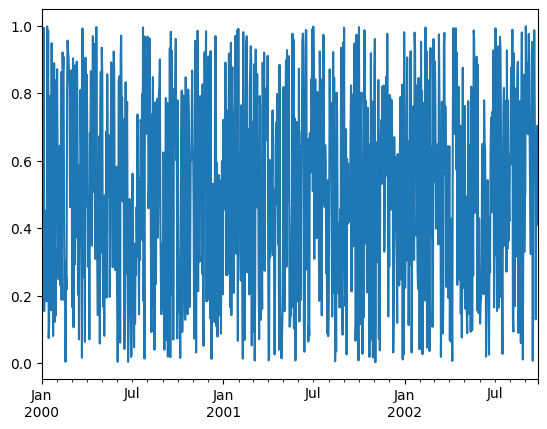

In [86]:
s = pd.Series(np.random.rand(1000), index=pd.date_range('1/1/2000', periods=1000))
s.plot()

<Figure size 640x480 with 0 Axes>

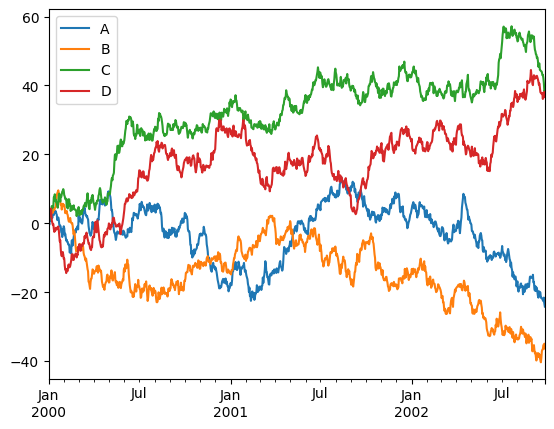

In [89]:
#plotng dataframe
df = pd.DataFrame(
    np.random.randn(1000, 4), index=s.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot();
plt.legend(loc='best')

## CSV

In [93]:
# saving to csv
df.to_csv('foo.csv') # you can open it on jupter

,A,B,C,D
2000-01-01,0.408471,0.824957,0.275831,1.461026
2000-01-02,-0.350295,1.993961,1.032723,2.887478
2000-01-03,1.984701,3.248250,3.029498,1.981671
2000-01-04,0.858051,2.863104,3.047453,3.237359
2000-01-05,1.370198,2.448037,3.034228,4.321159


In [110]:
#loading 
load_df = pd.read_csv('foo.csv')
load_df

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.408471,0.824957,0.275831,1.461026
1,2000-01-02,-0.350295,1.993961,1.032723,2.887478
2,2000-01-03,1.984701,3.248250,3.029498,1.981671
3,2000-01-04,0.858051,2.863104,3.047453,3.237359
4,2000-01-05,1.370198,2.448037,3.034228,4.321159
...,...,...,...,...,...
995,2002-09-22,-22.172143,-36.471802,43.089409,36.100522
996,2002-09-23,-22.518276,-35.271346,42.143327,37.852563
997,2002-09-24,-21.489240,-35.345116,40.725205,37.645572
998,2002-09-25,-23.236274,-34.842774,38.237405,38.166297


In [113]:
load_df.index = load_df.iloc[:,0]
load_df = df.iloc[:, 0:]
load_df

,A,B,C,D
2000-01-01,0.408471,0.824957,0.275831,1.461026
2000-01-02,-0.350295,1.993961,1.032723,2.887478
2000-01-03,1.984701,3.248250,3.029498,1.981671
2000-01-04,0.858051,2.863104,3.047453,3.237359
2000-01-05,1.370198,2.448037,3.034228,4.321159
...,...,...,...,...
2002-09-22,-22.172143,-36.471802,43.089409,36.100522
2002-09-23,-22.518276,-35.271346,42.143327,37.852563
2002-09-24,-21.489240,-35.345116,40.725205,37.645572
2002-09-25,-23.236274,-34.842774,38.237405,38.166297


## Excel

In [115]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [116]:
load_df = pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

In [117]:
load_df

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.408471,0.824957,0.275831,1.461026
1,2000-01-02,-0.350295,1.993961,1.032723,2.887478
2,2000-01-03,1.984701,3.248250,3.029498,1.981671
3,2000-01-04,0.858051,2.863104,3.047453,3.237359
4,2000-01-05,1.370198,2.448037,3.034228,4.321159
...,...,...,...,...,...
995,2002-09-22,-22.172143,-36.471802,43.089409,36.100522
996,2002-09-23,-22.518276,-35.271346,42.143327,37.852563
997,2002-09-24,-21.489240,-35.345116,40.725205,37.645572
998,2002-09-25,-23.236274,-34.842774,38.237405,38.166297


In [118]:
load_df.index = load_df.iloc[:,0]
load_df = df.iloc[:, 0:]
load_df

,A,B,C,D
2000-01-01,0.408471,0.824957,0.275831,1.461026
2000-01-02,-0.350295,1.993961,1.032723,2.887478
2000-01-03,1.984701,3.248250,3.029498,1.981671
2000-01-04,0.858051,2.863104,3.047453,3.237359
2000-01-05,1.370198,2.448037,3.034228,4.321159
...,...,...,...,...
2002-09-22,-22.172143,-36.471802,43.089409,36.100522
2002-09-23,-22.518276,-35.271346,42.143327,37.852563
2002-09-24,-21.489240,-35.345116,40.725205,37.645572
2002-09-25,-23.236274,-34.842774,38.237405,38.166297
